In [1]:
from collections import namedtuple

import sys
import numpy as np
from pathlib import Path
from IPython import display
import torchaudio
from tortoise.api import format_conditioning, pad_or_truncate, TextToSpeech
from tortoise.utils.audio import load_voices, wav_to_univnet_mel
import torch
import matplotlib.pyplot as plt

In [2]:
voice_1 = 'sasha_ryabchuk'
voice_2 = 'taras_sereda'
voice_3 = 'joe_rogan'
voice_root = Path('/home/taras/git-repos/one-lang/user_data/001_taras/voices')

voice_samples_1, conditioning_latents_1 = load_voices([voice_1], [voice_root])
voice_samples_2, conditioning_latents_2 = load_voices([voice_2], [voice_root])
voice_samples_3, conditioning_latents_3 = load_voices([voice_3], [voice_root])


Next step, is to extract conditioning latents for autoregressive and diffusion models respectively

In [3]:
tts = TextToSpeech()

In [4]:
auto_latents_1, diffusion_latents_1 = tts.get_conditioning_latents(voice_samples_1)
auto_latents_2, diffusion_latents_2 = tts.get_conditioning_latents(voice_samples_2)
auto_latents_3, diffusion_latents_3 = tts.get_conditioning_latents(voice_samples_3)


In [5]:
text = 'Attribute ranking learns the difference between two samples that are significantly different in a particular attribute'
seed = 1
verbose = False

In [6]:
res = tts.tts_with_preset(
    text,
    conditioning_latents=(auto_latents_1, diffusion_latents_1),
    use_deterministic_seed=seed,
    verbose=verbose)

display.Audio(data=res.squeeze().cpu().numpy(), rate=24000)

In [7]:
auto_latents_copy = auto_latents_1.clone()
auto_latents_copy[0, 704] = -100
res = tts.tts_with_preset(
    text,
    conditioning_latents=(auto_latents_copy, diffusion_latents_1),
    use_deterministic_seed=seed,
    verbose=verbose)
display.Audio(data=res.squeeze().cpu().numpy(), rate=24000)

In [8]:
auto_latents_copy = auto_latents_1.clone()
auto_latents_copy[0, 704] = -11
res = tts.tts_with_preset(
    text,
    conditioning_latents=(auto_latents_copy, diffusion_latents_1),
    use_deterministic_seed=seed,
    verbose=verbose)
display.Audio(data=res.squeeze().cpu().numpy(), rate=24000)

In [9]:
auto_latents_copy = auto_latents_1.clone()
auto_latents_copy[0, 704] = 100
res = tts.tts_with_preset(
    text,
    conditioning_latents=(auto_latents_copy, diffusion_latents_1),
    use_deterministic_seed=seed,
    verbose=verbose)
display.Audio(data=res.squeeze().cpu().numpy(), rate=24000)

In [10]:
auto_latents_copy = auto_latents_1.clone()
auto_latents_copy[0, 704] = -50
auto_latents_copy[0, 605] = -24
res = tts.tts_with_preset(
    text,
    conditioning_latents=(auto_latents_copy, diffusion_latents_1),
    use_deterministic_seed=seed,
    verbose=verbose)
display.Audio(data=res.squeeze().cpu().numpy(), rate=24000)

In [22]:
auto_latents_copy = auto_latents_1.clone()
auto_latents_copy[0, 704] = -50
auto_latents_copy[0, 605] = 30
res = tts.tts_with_preset(
    text,
    conditioning_latents=(auto_latents_copy, diffusion_latents_1),
    use_deterministic_seed=seed,
    verbose=verbose)
display.Audio(data=res.squeeze().cpu().numpy(), rate=24000)

In [20]:
auto_latents_copy = auto_latents_1.clone()
auto_latents_copy[0, 704] = -50
auto_latents_copy[0, 605] = -24

random_auto_latent, random_diffusion_latent =  tts.get_random_conditioning_latents()
res = tts.tts_with_preset(
    text,
    conditioning_latents=(auto_latents_copy, random_diffusion_latent),
    use_deterministic_seed=seed,
    verbose=verbose)
display.Audio(data=res.squeeze().cpu().numpy(), rate=24000)

In [18]:
random_diffusion_latent.shape

torch.Size([1, 2048])

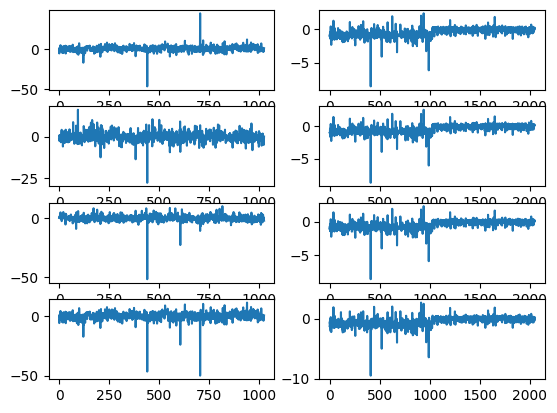

In [19]:
f, ax = plt.subplots(4, 2)
ax[0, 0].plot(auto_latents_1[0].cpu())
ax[1, 0].plot(auto_latents_2[0].cpu())
ax[2, 0].plot(auto_latents_3[0].cpu())
ax[3, 0].plot(auto_latents_copy[0].cpu())

ax[0, 1].plot(diffusion_latents_1[0].cpu())
ax[1, 1].plot(diffusion_latents_2[0].cpu())
ax[2, 1].plot(diffusion_latents_3[0].cpu())
ax[3, 1].plot(random_diffusion_latent[0].cpu())

Diffusion conditioning is almost useless, only autoregressive model's speaker conditional latents have some effect.
element under 750 index is a little bit correlated with accent, but this is not too hand wavy
element under 605 index is kinda correlated with speed of pronunciation.

In [102]:
torch.set_printoptions(threshold=10000)
auto_latents_3[0, 600:610]

tensor([  1.7707,  -0.5800,  -1.0121,  -1.7315,   0.8781, -24.0949,   1.0313,
          1.2786,  -1.0701,  -4.3582], device='cuda:0')

In [104]:
auto_latents_3[0, 605]

tensor(-24.0949, device='cuda:0')